In [85]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [86]:
# Sample data
y = np.array([576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594])
z = np.array([3.39, 3.30, 2.81, 3.03, 3.44, 3.07, 3.00, 3.43, 3.36, 3.13, 3.12, 2.74, 2.76, 2.88, 2.96])

# Calculate the correlation coefficient
corr_org, _ =  pearsonr(y, z)
#correlation_coefficient, _ = pearsonr(y, z)

print("Correlation coefficient:", corr_org)


Correlation coefficient: 0.776374491289407


In [87]:
# nonparametric bootstrap
def bootstrap_corr(y, z, n_boot, seed=None):

    rng = np.random.RandomState(seed)
    boot_replicates = np.zeros(shape=n_boot)
    
    for i in range(n_boot):
        rand_index = rng.choice(len(y), size=len(y), replace=True)
        boot_y = y[rand_index]
        boot_z = z[rand_index]
        boot_replicates[i], _ = pearsonr(boot_y, boot_z)
    return boot_replicates

In [88]:
n_array = np.array([25, 50, 100, 200, 400, 800, 1600, 3200])
std_array = np.zeros(shape=len(n_array))

for i in range(len(n_array)):
    boot_corrs = bootstrap_corr(y, z, n_array[i]) 
    std_array[i]  = np.std(boot_corrs, ddof=1)

print('n_array', n_array)
print('std_array', std_array)

n_array [  25   50  100  200  400  800 1600 3200]
std_array [0.17683777 0.12066435 0.15329994 0.14310327 0.13337345 0.1297031
 0.13173127 0.13121479]


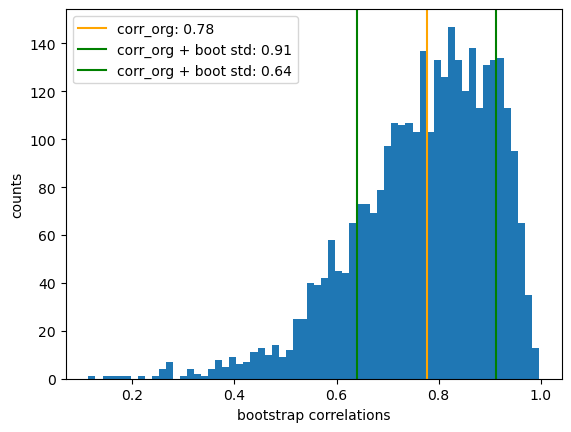

In [89]:
n_boot = 3200
boot_corrs = bootstrap_corr(y, z, n_boot) 
corrs_std  = np.std(boot_corrs, ddof=1)

corr_org_plus_std = corr_org + corrs_std
corr_org_minus_std = corr_org - corrs_std

plt.hist(boot_corrs, bins=int(n_boot/50))
plt.axvline(corr_org, color='orange', label='corr_org: %.2f' % corr_org)
plt.axvline(corr_org_plus_std, color='green', label='corr_org + boot std: %.2f' % corr_org_plus_std)
plt.axvline(corr_org_minus_std, color='green', label='corr_org + boot std: %.2f' % corr_org_minus_std)
plt.xlabel('bootstrap correlations')
plt.ylabel('counts')
plt.legend(loc=2)
plt.show()

In [90]:
# Parametric Bootstrap (fitting a two-dim Gaussian)
def par_bootstrap_corr(y, z, n_boot, seed=None):
    
    vectors = np.transpose(np.vstack((y,z)))
    mean = np.mean(vectors, axis=0)
    zero_mean_vectors = vectors - mean
    outer_products = np.array([np.outer(z, z) for z in zero_mean_vectors])
    cov_matrix = np.sum(outer_products, axis=0) / (len(vectors) - 1)

    boot_replicates = np.zeros(shape=n_boot)
    
    for i in range(n_boot):
        random_vectors = np.random.multivariate_normal(mean, cov_matrix, len(y))
        boot_y = random_vectors[:, 0]
        boot_z = random_vectors[:, 1]
        boot_replicates[i], _ = pearsonr(boot_y, boot_z)
    return boot_replicates


0.12048233007230194


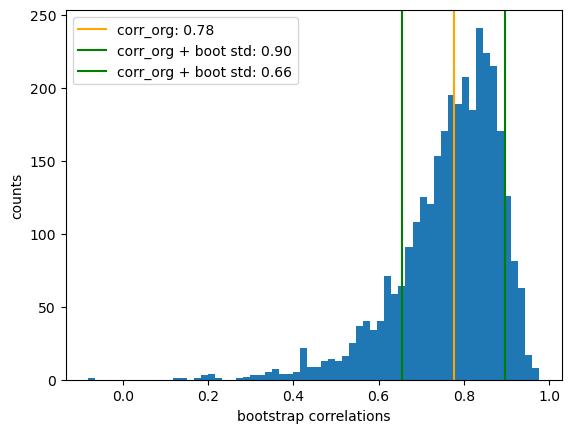

In [91]:
n_boot = 3200
boot_corrs = par_bootstrap_corr(y, z, n_boot) 
corrs_std  = np.std(boot_corrs, ddof=1)
print(corrs_std)

corr_org_plus_std = corr_org + corrs_std
corr_org_minus_std = corr_org - corrs_std

plt.hist(boot_corrs, bins=int(n_boot/50))
plt.axvline(corr_org, color='orange', label='corr_org: %.2f' % corr_org)
plt.axvline(corr_org_plus_std, color='green', label='corr_org + boot std: %.2f' % corr_org_plus_std)
plt.axvline(corr_org_minus_std, color='green', label='corr_org + boot std: %.2f' % corr_org_minus_std)
plt.xlabel('bootstrap correlations')
plt.ylabel('counts')
plt.legend(loc=2)
plt.show()